In [9]:
!pip install tensorflow pillow matplotlib  Image --quiet 


DEPRECATION: Loading egg at c:\python312\lib\site-packages\vboxapi-1.0-py3.12.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330


In [10]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

train_dir = r"D:\KULIAH\Semester 5\Pengenalan Pola\DogBreed_Website\dog"
test_dir = r"D:\KULIAH\Semester 5\Pengenalan Pola\DogBreed_Website\dog"


num_classes = 70
image_size = (224, 224)  # Corrected variable name
batch_size = 32
learning_rate = 0.01
epochs = 10

training_data = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

validation_data = ImageDataGenerator(rescale=1./255)

base_model = InceptionV3(weights="imagenet", include_top=False, input_shape=(image_size[0], image_size[1], 3))

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(num_classes, activation="softmax")(x)

model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer=Adam(learning_rate=learning_rate), loss='categorical_crossentropy', metrics=["accuracy"])

train_generator = training_data.flow_from_directory(
    train_dir,
    target_size=image_size,  # Corrected variable name
    batch_size=batch_size,
    class_mode="categorical"
)

valid_generator = validation_data.flow_from_directory(
    test_dir,
    target_size=image_size,  # Corrected variable name
    batch_size=batch_size,
    class_mode="categorical"
)

# Calculate steps_per_epoch and validation_steps
steps_per_epoch = train_generator.samples // batch_size
validation_steps = valid_generator.samples // batch_size

history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=epochs,
    validation_data=valid_generator,
    validation_steps=validation_steps
)

model.save("dogclassification.h5")


Found 8456 images belonging to 70 classes.
Found 8456 images belonging to 70 classes.


c:\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10


KeyboardInterrupt: 

In [5]:
from tensorflow.keras.models import load_model

# Load the saved model
model = load_model("dogclassification.h5")

# Print the model summary to understand its architecture
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 111, 111,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 111, 111,  │         96 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 111, 111,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 109, 109,  │      9,216 │ activation[0][0]  │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 109, 109,  │         96 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 109, 109,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 109, 109,  │     18,432 │ activation_1[0][… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 109, 109,  │        192 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 109, 109,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 54, 54,    │          0 │ activation_2[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 54, 54,    │      5,120 │ max_pooling2d[0]… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 54, 54,    │        240 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 54, 54,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 52, 52,    │    138,240 │ activation_3[0][… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 52, 52,    │        576 │ conv2d_4[0][0]    │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_4        │ (None, 52, 52,    │          0 │ batch_normalizat

 Total params: 23,972,712 (91.45 MB)

 Trainable params: 2,169,926 (8.28 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

 Optimizer params: 2 (12.00 B)

In [ ]:
#80 :  20

In [2]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import numpy as np

train_dir = r"D:\KULIAH\Semester 5\Pengenalan Pola\DogBreed_Website\dog"
test_dir = r"D:\KULIAH\Semester 5\Pengenalan Pola\DogBreed_Website\dog"

num_classes = 70
image_size = (224, 224)
batch_size = 32
learning_rate = 0.01
epochs = 10

# ImageDataGenerator untuk pelatihan dan validasi
train_data_gen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # 20% data akan digunakan untuk validasi
)

valid_data_gen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Generator untuk training (80% data)
train_generator = train_data_gen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'  # Memilih subset untuk pelatihan
)

# Generator untuk validasi (20% data)
valid_generator = valid_data_gen.flow_from_directory(
    test_dir,  # menggunakan direktori yang sama untuk validasi
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'  # Memilih subset untuk validasi
)

# Membuat model dengan InceptionV3 sebagai base
base_model = InceptionV3(weights="imagenet", include_top=False, input_shape=(image_size[0], image_size[1], 3))

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(num_classes, activation="softmax")(x)

model = Model(inputs=base_model.input, outputs=predictions)

# Membekukan layer base model
for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer=Adam(learning_rate=learning_rate), loss='categorical_crossentropy', metrics=["accuracy"])

# Melatih model
steps_per_epoch = train_generator.samples // batch_size
validation_steps = valid_generator.samples // batch_size

history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=epochs,
    validation_data=valid_generator,
    validation_steps=validation_steps
)

# Menyimpan model ke file .h5
model.save("dogclassification.h5")
print("Model berhasil disimpan!")


Found 6800 images belonging to 70 classes.
Found 1659 images belonging to 70 classes.


c:\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
212/212 ━━━━━━━━━━━━━━━━━━━━ 370s 2s/step - accuracy: 0.6006 - loss: 6.1876 - val_accuracy: 0.7941 - val_loss: 0.8087
Epoch 2/10
  1/212 ━━━━━━━━━━━━━━━━━━━━ 3:16 934ms/step - accuracy: 0.7812 - loss: 0.7272

c:\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


212/212 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7812 - loss: 0.7272 - val_accuracy: 0.8889 - val_loss: 0.5682
Epoch 3/10
212/212 ━━━━━━━━━━━━━━━━━━━━ 285s 1s/step - accuracy: 0.8369 - loss: 0.6571 - val_accuracy: 0.8039 - val_loss: 0.8891
Epoch 4/10
212/212 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7812 - loss: 0.7677 - val_accuracy: 0.7778 - val_loss: 1.0541
Epoch 5/10
212/212 ━━━━━━━━━━━━━━━━━━━━ 270s 1s/step - accuracy: 0.8329 - loss: 0.7127 - val_accuracy: 0.8113 - val_loss: 1.1966
Epoch 6/10
212/212 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8125 - loss: 0.5468 - val_accuracy: 0.8148 - val_loss: 0.4841
Epoch 7/10
212/212 ━━━━━━━━━━━━━━━━━━━━ 258s 1s/step - accuracy: 0.8624 - loss: 0.6064 - val_accuracy: 0.8076 - val_loss: 1.0044
Epoch 8/10
212/212 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7188 - loss: 0.7338 - val_accuracy: 0.7407 - val_loss: 0.8439
Epoch 9/10
212/212 ━━━━━━━━━━━━━━━━━━━━ 240s 1s/step - accuracy: 0.8627 - loss: 0.5223 - val_accuracy: 0.8168 - 

Model berhasil disimpan!


In [6]:
import os
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing import image

model = load_model("dogclassification.h5")
# Directory containing test images with subdirectories for each class
test_dir = r"D:\KULIAH\Semester 5\Pengenalan Pola\DogBreed_Website\dog"
predictions = []
true_labels = []
all_images = []
confidence_scores = []

# Define class names
class_names = {
        "0": "Afghan",
        "1": "African Wild Dog",
        "2": "Airedale",
        "3": "American Hairless",
        "4": "American Spaniel",
        "5": "Basenji",
        "6": "Basset",
        "7": "Beagle",
        "8": "Bearded Collie",
        "9": "Bermaise",
        "10": "Bichon Frise",
        "11": "Blenheim",
        "12": "Bloodhound",
        "13": "Bluetick",
        "14": "Border Collie",
        "15": "Borzoi",
        "16": "Boston Terrier",
        "17": "Boxer",
        "18": "Bull Mastiff",
        "19": "Bull Terrier",
        "20": "Bulldog",
        "21": "Cairn",
        "22": "Chihuahua",
        "23": "Chinese Crested",
        "24": "Chow",
        "25": "Clumber",
        "26": "Cockapoo",
        "27": "Cocker",
        "28": "Collie",
        "29": "Corgi",
        "30": "Coyote",
        "31": "Dalmation",
        "32": "Dhole",
        "33": "Dingo",
        "34": "Doberman",
        "35": "Elk Hound",
        "36": "French Bulldog",
        "37": "German Sheperd",
        "38": "Golden Retriever",
        "39": "Great Dane",
        "40": "Great Perenees",
        "41": "Greyhound",
        "42": "Groenendael",
        "43": "Irish Spaniel",
        "44": "Irish Wolfhound",
        "45": "Japanese Spaniel",
        "46": "Komondor",
        "47": "Labradoodle",
        "48": "Labrador",
        "49": "Lhasa",
        "50": "Malinois",
        "51": "Maltese",
        "52": "Mex Hairless",
        "53": "Newfoundland",
        "54": "Pekinese",
        "55": "Pit Bull",
        "56": "Pomeranian",
        "57": "Poodle",
        "58": "Pug",
        "59": "Rhodesian",
        "60": "Rottweiler",
        "61": "Saint Bernard",
        "62": "Schnauzer",
        "63": "Scotch Terrier",
        "64": "Shar_Pei",
        "65": "Shiba Inu",
        "66": "Shih-Tzu",
        "67": "Siberian Husky",
        "68": "Vizsla",
        "69": "Yorkie"
}

# Loop through each class folder and generate predictions
for class_name in os.listdir(test_dir):
    class_path = os.path.join(test_dir, class_name)
    if os.path.isdir(class_path):
        for img_name in os.listdir(class_path):
            img_path = os.path.join(class_path, img_name)
            img = image.load_img(img_path, target_size=(224, 224))
            img_array = image.img_to_array(img) / 255.0
            img_array = np.expand_dims(img_array, axis=0)
            pred = model.predict(img_array)
            
            # Get predicted label index and confidence score
            predicted_label_index = np.argmax(pred)
            confidence_score = pred[0][predicted_label_index] * 100  # Convert to percentage
            
            # Append results to lists
            predictions.append(predicted_label_index)
            confidence_scores.append(confidence_score)
            true_labels.append(list(class_names.values()).index(class_name))
            all_images.append(img_path)

# Convert predictions, true labels, and confidence scores to arrays
predictions = np.array(predictions)
true_labels = np.array(true_labels)
confidence_scores = np.array(confidence_scores)

# Prepare data for CSV
data = {
    "image_path": all_images,
    "true_label": [list(class_names.values())[i] for i in true_labels],
    "predicted_label": [list(class_names.values())[i] for i in predictions],
    "confidence_score (%)": confidence_scores,  # Confidence percentage
}

# Create DataFrame
df = pd.DataFrame(data)

# Save DataFrame to CSV
output_csv_path = r"D:\KULIAH\Semester 5\Pengenalan Pola\DogBreed_Website\predictions_with_confidence.csv"
df.to_csv(output_csv_path, index=False)
print(f"Predictions with confidence scores saved to {output_csv_path}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━

In [15]:
# Load the CSV file
csv_path = r"D:\KULIAH\Semester 5\Pengenalan Pola\DogBreed_Website\predictions_with_confidence.csv"
df = pd.read_csv(csv_path)
df

,image_path,true_label,predicted_label,confidence_score (%)
0,D:\KULIAH\Semester 5\Pengenalan Pola\DogBreed_...,Afghan,Afghan,100.000000
1,D:\KULIAH\Semester 5\Pengenalan Pola\DogBreed_...,Afghan,Afghan,100.000000
2,D:\KULIAH\Semester 5\Pengenalan Pola\DogBreed_...,Afghan,Afghan,100.000000
3,D:\KULIAH\Semester 5\Pengenalan Pola\DogBreed_...,Afghan,Afghan,99.833834
4,D:\KULIAH\Semester 5\Pengenalan Pola\DogBreed_...,Afghan,Afghan,99.999440
...,...,...,...,...
8454,D:\KULIAH\Semester 5\Pengenalan Pola\DogBreed_...,Yorkie,Yorkie,99.840778
8455,D:\KULIAH\Semester 5\Pengenalan Pola\DogBreed_...,Yorkie,Yorkie,99.449098
8456,D:\KULIAH\Semester 5\Pengenalan Pola\DogBreed_...,Yorkie,Yorkie,99.569750
8457,D:\KULIAH\Semester 5\Pengenalan Pola\DogBreed_...,Yorkie,Yorkie,99.714017


Accuracy: 0.8721
Precision (weighted): 0.8791
Recall (weighted): 0.8721
F1 Score (weighted): 0.8677

Classification Report:
                   precision    recall  f1-score   support

           Afghan       0.96      0.99      0.97       115
 African Wild Dog       1.00      0.98      0.99       119
         Airedale       0.83      0.99      0.90       127
American Hairless       0.57      0.25      0.34        65
 American Spaniel       0.70      0.82      0.76        89
          Basenji       0.96      0.95      0.95        99
           Basset       0.90      0.99      0.94       169
           Beagle       0.98      0.83      0.90       133
   Bearded Collie       0.98      0.78      0.87        79
         Bermaise       0.98      1.00      0.99       141
     Bichon Frise       1.00      0.74      0.85       115
         Blenheim       0.93      0.93      0.93       123
       Bloodhound       0.99      0.97      0.98       157
         Bluetick       1.00      0.95      0.97 

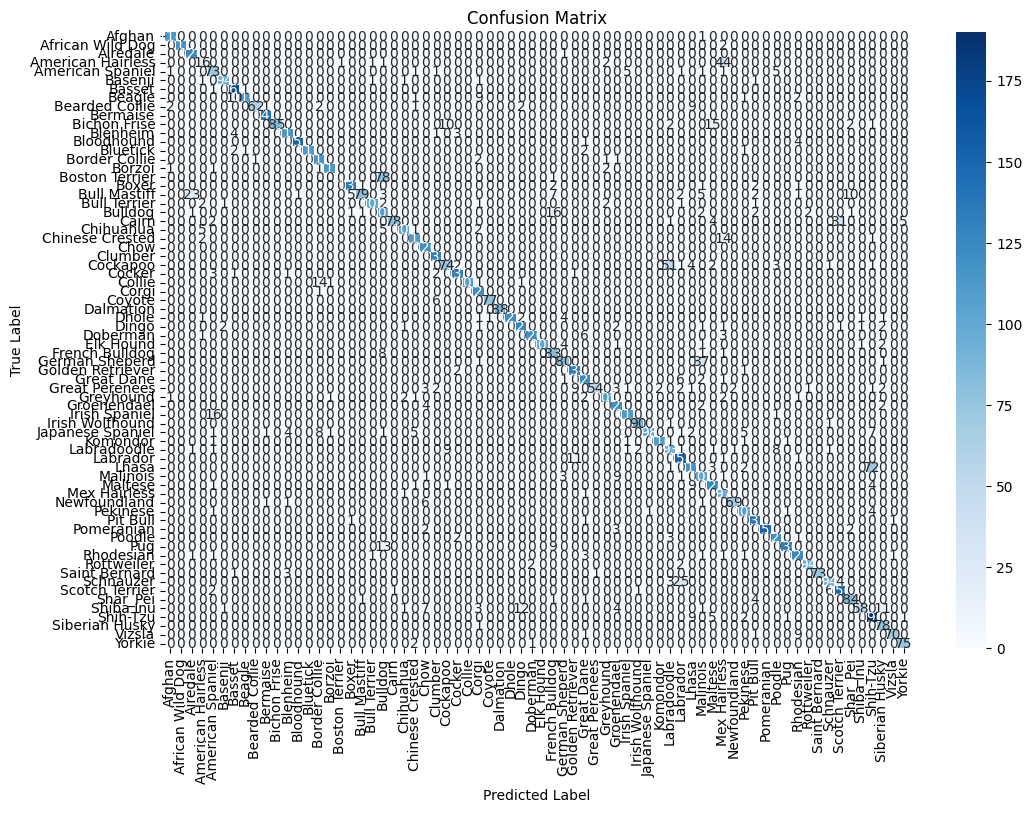

In [8]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV containing predictions
csv_path = r"D:\KULIAH\Semester 5\Pengenalan Pola\DogBreed_Website\predictions_with_confidence.csv"
df = pd.read_csv(csv_path)

# Extract the true labels and predicted labels
true_labels = df['true_label']
predicted_labels = df['predicted_label']

# Calculate the accuracy
accuracy = accuracy_score(true_labels, predicted_labels)

# Calculate precision, recall, and F1-score (averaged for multi-class)
precision = precision_score(true_labels, predicted_labels, average='weighted')
recall = recall_score(true_labels, predicted_labels, average='weighted')
f1 = f1_score(true_labels, predicted_labels, average='weighted')

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (weighted): {precision:.4f}")
print(f"Recall (weighted): {recall:.4f}")
print(f"F1 Score (weighted): {f1:.4f}")

# Print detailed classification report
class_report = classification_report(true_labels, predicted_labels, output_dict=True)
print("\nClassification Report:")
print(classification_report(true_labels, predicted_labels))

# Save metrics to CSV
metrics_data = {
    "Metric": ["Accuracy", "Precision", "Recall", "F1 Score"],
    "Score": [accuracy, precision, recall, f1]
}
metrics_df = pd.DataFrame(metrics_data)
metrics_df.to_csv("evaluation_metrics.csv", index=False)

# Save classification report to CSV
class_report_df = pd.DataFrame(class_report).transpose()
class_report_df.to_csv("classification_report.csv", index=True)

# Generate the confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Plot the confusion matrix using seaborn's heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(true_labels), yticklabels=np.unique(true_labels))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Save the plot as a JPG image
plt.savefig("confusion_matrix.jpg", format='jpg', dpi=300)
plt.show()



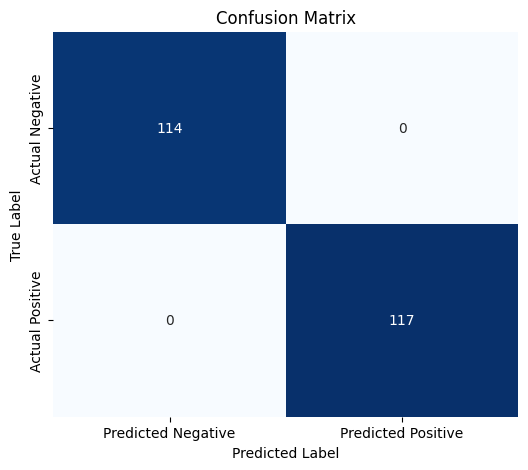

True Positives (TP): 117
True Negatives (TN): 114
False Positives (FP): 0
False Negatives (FN): 0


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix

# Assuming `true_labels` and `predicted_labels` are your true and predicted labels, respectively
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Extract TP, TN, FP, FN for a binary classification problem
TP = conf_matrix[1, 1]
TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]

# Create a 2x2 matrix to display with the calculated values
matrix_data = np.array([[TN, FP], [FN, TP]])

# Plot the confusion matrix with annotations
plt.figure(figsize=(6, 5))
sns.heatmap(matrix_data, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=["Predicted Negative", "Predicted Positive"], yticklabels=["Actual Negative", "Actual Positive"])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Print TP, TN, FP, FN
print(f"True Positives (TP): {TP}")
print(f"True Negatives (TN): {TN}")
print(f"False Positives (FP): {FP}")
print(f"False Negatives (FN): {FN}")

fdfdf

In [ ]:
#if we use 60 :  40